In [1]:
!pip install matplotlib


In [2]:
import sqlite3

conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Sales (
        id INTEGER PRIMARY KEY,
        date TEXT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

sales_data = [
    ('2025-01-15', 'Widget A', 10, 19.99),
    ('2025-01-20', 'Widget B', 5, 29.99),
    ('2025-02-05', 'Widget A', 8, 19.99),
    ('2025-02-20', 'Widget C', 7, 39.99),
    ('2025-03-12', 'Widget D', 34,500.00)
]

cursor.executemany("INSERT INTO Sales (date, product, quantity, price) VALUES (?, ?, ?, ?)", sales_data)
conn.commit()


In [3]:
import pandas as pd

query = '''
    SELECT 
        strftime('%Y-%m', date) AS month,
        SUM(quantity * price) AS total_sales
    FROM Sales
    GROUP BY month
    ORDER BY month;
'''

df = pd.read_sql_query(query, conn)
print(df)


     month  total_sales
0  2025-01        699.7
1  2025-02        879.7
2  2025-03      17000.0


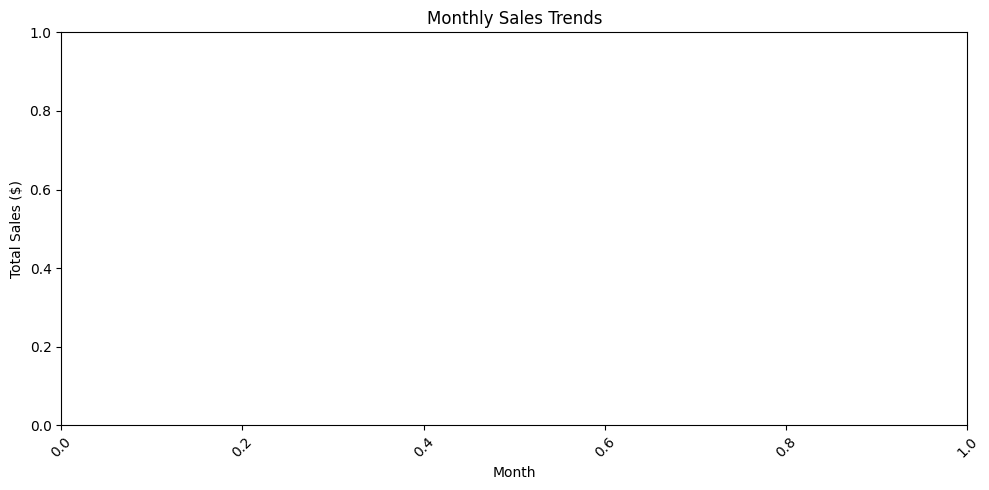

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
